In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.api.types import is_datetime64_any_dtype
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor

In [2]:
df1= pd.read_csv('../data/data1.csv')
df2= pd.read_csv('../data/data2.csv')
df3= pd.read_csv('../data/data3.csv')
df4= pd.read_csv('../data/data4.csv')
df5= pd.read_csv('../data/data5.csv')
df6= pd.read_csv('../data/data6.csv')
df8= pd.read_csv('../data/data8.csv')
df_4_threads = pd.read_csv('../data/4threads.csv')
df_6_threads = pd.read_csv('../data/6threads.csv')
df_4_6_threads = pd.concat([df_4_threads, df_6_threads], ignore_index=True)

In [3]:
display(df1.describe().T)
df1.head()

,count,mean,std,min,25%,50%,75%,max
value,188.0,0.471006,0.217891,-0.318728,0.319081,0.332098,0.708332,1.339762


,date,value
0,2024-01-01,0.321490
1,2024-01-02,0.322059
2,2024-01-03,NaN
3,2024-01-04,0.331385
4,2024-01-05,0.327712


In [4]:
display(df2.describe().T)
df2.head()

,count,mean,std,min,25%,50%,75%,max
value,188.0,0.672863,0.2285,-0.1969,0.516008,0.77749,0.817156,1.451575


,date,value
0,2024-01-01,0.862862
1,2024-01-02,0.863686
2,2024-01-03,0.867064
3,2024-01-04,0.866030
4,2024-01-05,0.845779


In [5]:
display(df3.describe().T)
df3.head()

,count,mean,std,min,25%,50%,75%,max
value,188.0,0.586638,0.161562,0.140112,0.408387,0.630897,0.698219,1.236263


,date,value
0,2024-01-01,0.318111
1,2024-01-02,0.339262
2,2024-01-03,NaN
3,2024-01-04,0.354690
4,2024-01-05,0.345999


In [6]:
display(df4.describe().T)
df4.head()

,count,mean,std,min,25%,50%,75%,max
value,188.0,0.588595,0.207615,-0.132897,0.414029,0.601949,0.725972,1.362844


,date,value
0,2024-01-01,0.311355
1,2024-01-02,0.288668
2,2024-01-03,0.318044
3,2024-01-04,0.327835
4,2024-01-05,0.316202


In [7]:
display(df5.describe().T)
df5.head()

,count,mean,std,min,25%,50%,75%,max
value,188.0,0.638129,0.147484,0.072734,0.504286,0.66601,0.751192,0.954892


,date,value
0,2024-01-01,0.757531
1,2024-01-02,0.718990
2,2024-01-03,0.760947
3,2024-01-04,0.751997
4,2024-01-05,0.760936


In [8]:
display(df6.describe().T)
df6.head()

,count,mean,std,min,25%,50%,75%,max
value,186.0,0.38866,0.083497,0.101479,0.343556,0.358144,0.465403,0.725775


,date,value
0,2024-01-01,0.349284
1,2024-01-02,0.356819
2,2024-01-03,0.369898
3,2024-01-04,0.365482
4,2024-01-05,0.370966


In [9]:
display(df8.describe().T)
df8.head()

,count,mean,std,min,25%,50%,75%,max
Value,200.0,0.570414,0.207876,0.107604,0.39282,0.491105,0.750852,0.980531


,Date,Value
0,2024-01-01,0.672173
1,2024-01-02,0.842921
2,2024-01-03,0.894061
3,2024-01-04,0.806412
4,2024-01-05,0.712018


In [10]:
display(df_4_threads.describe().T)
display(df_4_threads.head())

,count,mean,std,min,25%,50%,75%,max
ram_usage_GB,80.0,8.117216,0.405210,7.013573,8.21021,8.23839,8.257956,8.670658
ram_utilization_percent,80.0,51.015000,2.547280,44.100000,51.60000,51.80000,51.900000,54.500000
cpu_utilization_percent,80.0,64.196250,20.614567,7.800000,61.17500,67.50000,79.200000,92.100000


,time,ram_usage_GB,ram_utilization_percent,cpu_utilization_percent
0,2025-08-17_21-45-25,7.876648,49.5,43.7
1,2025-08-17_21-45-26,7.578224,47.6,80.3
2,2025-08-17_21-45-27,7.842964,49.3,71.3
3,2025-08-17_21-45-28,7.843349,49.3,75.8
4,2025-08-17_21-45-29,7.816677,49.1,67.7


In [11]:
display(df_6_threads.describe().T)
display(df_6_threads.head())

,count,mean,std,min,25%,50%,75%,max
ram_usage_GB,100.0,6.935135,0.828887,5.956783,6.401483,6.434065,7.59651,8.768787
ram_utilization_percent,100.0,43.569000,5.207603,37.400000,40.200000,40.400000,47.70000,55.100000
cpu_utilization_percent,100.0,88.013000,21.761154,10.300000,93.225000,95.850000,97.92500,99.600000


,time,ram_usage_GB,ram_utilization_percent,cpu_utilization_percent
0,2025-08-17_21-49-03,7.485516,47.0,28.8
1,2025-08-17_21-49-04,7.357121,46.2,88.2
2,2025-08-17_21-49-05,7.411015,46.6,89.5
3,2025-08-17_21-49-07,7.402153,46.5,79.5
4,2025-08-17_21-49-08,7.379654,46.4,83.5


In [12]:
# ---------- 1) Z-score outlier removal ----------
def remove_outliers_zscore(df: pd.DataFrame, col: str, threshold: float = 3.0) -> pd.DataFrame:
    s = df[col]
    mu, sigma = s.mean(skipna=True), s.std(skipna=True, ddof=0)
    if sigma == 0 or np.isnan(sigma):
        return df.copy()
    z = (s - mu) / sigma
    mask = s.isna() | (z.abs() <= threshold)
    return df.loc[mask].copy()


# ---------- Z-score outlier detecting ----------
def detect_outliers_zscore(df: pd.DataFrame, col: str, threshold: float = 3.0) -> pd.Series:
    s = df[col]
    mu = s.mean(skipna=True)
    sigma = s.std(skipna=True, ddof=0)
    if sigma == 0 or np.isnan(sigma):
        return pd.Series(False, index=df.index, name=f"{col}_is_outlier")
    z = (s - mu) / sigma
    mask = (~s.isna()) & (z.abs() > threshold)
    mask.name = f"{col}_is_outlier"
    return mask

In [13]:
# ---------- 2) IQR outlier removal ----------
def remove_outliers_iqr(df: pd.DataFrame, col: str, k: float = 1.5) -> pd.DataFrame:
    s = df[col]
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0 or np.isnan(iqr):
        return df.copy()
    lower, upper = q1 - k * iqr, q3 + k * iqr
    mask = s.isna() | s.between(lower, upper)
    return df.loc[mask].copy()


# ---------- IQR outlier detecting ----------
def detect_outliers_iqr(df: pd.DataFrame, col: str, k: float = 1.5) -> pd.Series:
    s = df[col]
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0 or np.isnan(iqr):
        return pd.Series(False, index=df.index, name=f"{col}_is_outlier")
    lower, upper = q1 - k * iqr, q3 + k * iqr
    mask = (~s.isna()) & ~s.between(lower, upper)
    return mask

In [14]:
# ---------- 3) Linear-regression-based outlier removal ----------
def remove_outliers_linear_regression(df, value_col, time_col=None, z_thresh=3.0):
    time = df[time_col]

    time = pd.Series(time).rank(method="first").to_numpy().reshape(-1, 1)
    values = df[value_col]

    # Only use rows without NaN for fitting
    mask = ~values.isna()
    if mask.sum() < 2:
        return df.copy()

    # Fit regression
    model = LinearRegression().fit(time[mask], values[mask])
    preds = model.predict(time[mask])

    # Compute residual z-scoresa
    residuals = values[mask] - preds
    z = (residuals - residuals.mean()) / residuals.std(ddof=0)

    # Keep: rows with small residuals OR rows we didn’t fit (NaNs)
    keep_idx = df.index[mask][np.abs(z) <= z_thresh].tolist()
    keep_idx += df.index[~mask].tolist()

    return df.loc[keep_idx].copy()


# ---------- Linear-regression-based outlier detecting ----------
def detect_outliers_linear_regression(df: pd.DataFrame, value_col: str, time_col: str, z_thresh: float = 3.0) -> pd.Series:
    time = df[time_col]
    time_rank = pd.Series(time).rank(method="first").to_numpy().reshape(-1, 1)
    values = df[value_col]

    mask = ~values.isna()
    if mask.sum() < 2:
        return pd.Series(False, index=df.index, name=f"{value_col}_is_outlier")

    model = LinearRegression().fit(time_rank[mask], values[mask])
    preds = model.predict(time_rank[mask])

    residuals = values[mask] - preds
    sigma = residuals.std(ddof=0)
    if sigma == 0 or np.isnan(sigma):
        return pd.Series(False, index=df.index, name=f"{value_col}_is_outlier")

    z = (residuals - residuals.mean()) / sigma
    outlier_mask = pd.Series(False, index=df.index)
    outlier_mask.loc[mask] = np.abs(z) > z_thresh
    return outlier_mask

In [15]:
# ---------- 4) Local Outlier Factor (LOF) outlier removal ----------
def remove_outliers_lof(data, n_neighbors=20, contamination=0.05):
    labels = detect_outliers_lof(data, n_neighbors, contamination)
    if isinstance(data, pd.DataFrame):
        return data[labels == 1]
    else:
        return data[labels == 1, :]

# ---------- Local Outlier Factor (LOF) outlier detecting ----------
def detect_outliers_lof(df: pd.DataFrame,y: str,time_col: str | None = None,n_neighbors: int = 20,contamination: float = 0.05,include_time: bool = False,):
    yvals = pd.to_numeric(df[y], errors="coerce")
    valid_mask = yvals.notna()

    # Build feature matrix X
    if include_time and time_col is not None:
        tx = df[time_col]
        if is_datetime64_any_dtype(tx):
            tnum = mdates.date2num(pd.to_datetime(tx))
        else:
            tnum = pd.to_numeric(tx, errors="coerce").to_numpy()
        # rows are valid only where both y and time are valid numbers
        valid_mask = valid_mask & pd.notna(tnum)
        X = np.column_stack([tnum[valid_mask], yvals[valid_mask].to_numpy()])
    else:
        X = yvals[valid_mask].to_numpy().reshape(-1, 1)

    if X.shape[0] == 0:
        # no valid data; return all-False mask
        return pd.Series(False, index=df.index)

    # Fit LOF
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    labels = lof.fit_predict(X)  # 1 for inlier, -1 for outlier

    mask = pd.Series(False, index=df.index)
    mask.loc[valid_mask.index[valid_mask]] = (labels == -1)
    return mask


In [16]:
# ---------- Missing data filling ----------
def fill_forward(df: pd.DataFrame, col: str, limit: int = None) -> pd.DataFrame:
    out = df.copy()
    out[col] = out[col].ffill(limit=limit)
    return out


def fill_backward(df: pd.DataFrame, col: str, limit: int = None) -> pd.DataFrame:
    out = df.copy()
    out[col] = out[col].bfill(limit=limit)
    return out

def fill_with_window_mean(df: pd.DataFrame, col: str, window: int = 3, min_periods: int = 1, center: bool = False) -> pd.DataFrame:
    s = df[col]
    roll = s.rolling(window=window, min_periods=min_periods, center=center).mean()
    out = df.copy()
    out[col] = s.where(~s.isna(), roll)
    return out

def fill_linear_interpolation(df: pd.DataFrame, col: str, limit_direction: str = "both", limit: int = None) -> pd.DataFrame:
    out = df.copy()
    out[col] = df[col].interpolate(method="linear", limit_direction=limit_direction, limit=limit)
    return out

In [17]:
def plot_time_series(df: pd.DataFrame, x: str, y: str, step: int = 10,
                     xmin=None, xmax=None, ymin=None, ymax=None,
                     outlier_method=None,
                     **kwargs):
    xvals = df[x]
    yvals = df[y]

    fig, ax = plt.subplots(figsize=(16, 6))

    if is_datetime64_any_dtype(xvals):
        # Use matplotlib date numbers for BOTH line and scatter
        xv = mdates.date2num(pd.to_datetime(xvals))
        ax.plot_date(xv, yvals, "-", label=y, zorder=2)

        locator = mdates.AutoDateLocator()
        formatter = mdates.ConciseDateFormatter(locator)
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)

        # Optional x-lims if provided
        if xmin is not None or xmax is not None:
            left = mdates.date2num(pd.to_datetime(xmin)) if xmin is not None else None
            right = mdates.date2num(pd.to_datetime(xmax)) if xmax is not None else None
            ax.set_xlim(left=left, right=right)
    else:
        xv = np.arange(len(xvals))
        ax.plot(xv, yvals, label=y, zorder=2)

        # Simple ticks every 10
        if len(xvals) > 0:
            ticks = np.arange(0, len(xvals), step)
            ax.set_xticks(ticks)
            ax.set_xticklabels(xvals.astype(str).iloc[ticks], rotation=45, ha="right")

        if xmin is not None or xmax is not None:
            ax.set_xlim(left=xmin, right=xmax)

    if ymin is not None or ymax is not None:
        ax.set_ylim(bottom=ymin, top=ymax)

    # ---- choose outlier method
    m = pd.Series(False, index=df.index)

    
    if outlier_method is not None:
        om = outlier_method.lower()
        if om == "zscore":
            m = detect_outliers_zscore(df, y, threshold=kwargs.get("threshold", 3.0))
        elif om == "iqr":
            m = detect_outliers_iqr(df, y, k=kwargs.get("k", 1.5))
        elif om == "linear":
            m = detect_outliers_linear_regression(df, y, time_col=x, z_thresh=kwargs.get("z_thresh", 3.0))
        elif om == "lof":
            m = detect_outliers_lof(
                df=df,
                y=y,
                time_col=x,
                n_neighbors=kwargs.get("n_neighbors", 20),
                contamination=kwargs.get("contamination", 0.05),
                include_time=kwargs.get("include_time", False),
            )

        if m.any():
            ax.scatter(xv[m.to_numpy()], yvals[m], s=60, color="red",
                    zorder=3, label=f"Outlier: {om}")

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend()
    plt.tight_layout()
    plt.show()



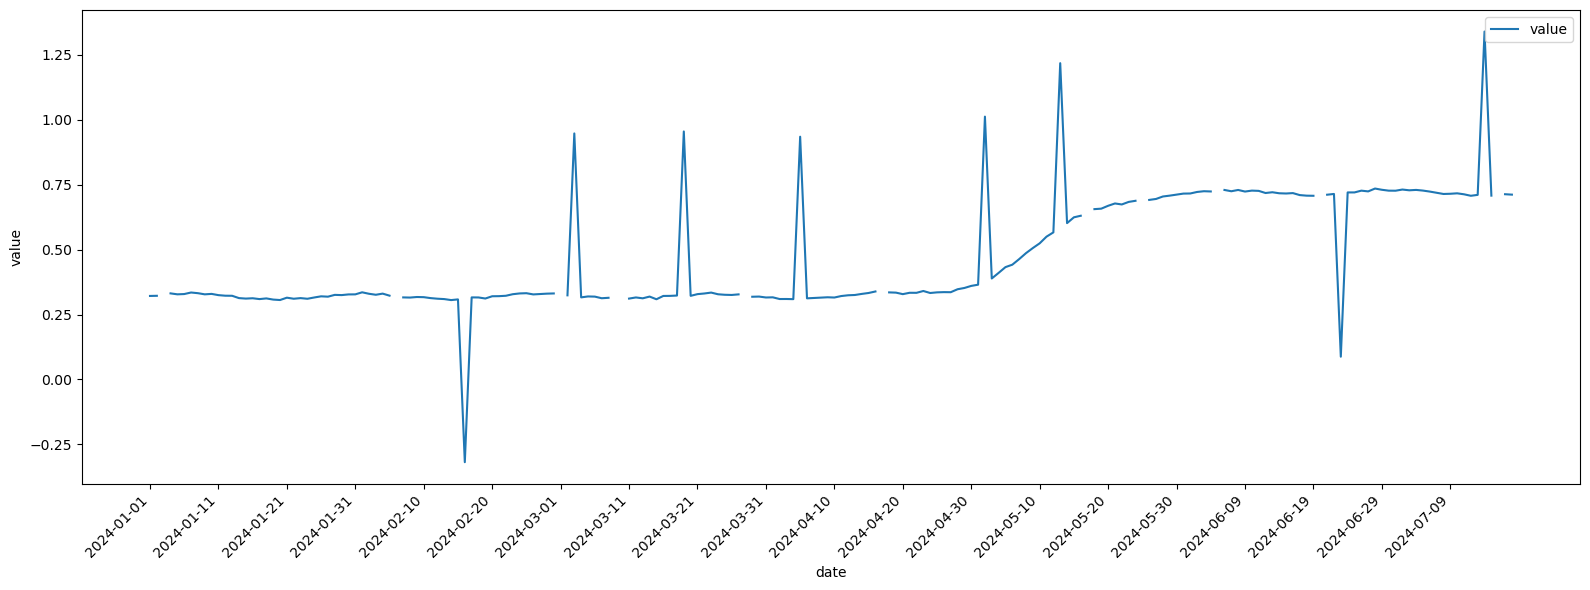

In [18]:
plot_time_series(df1,'date','value')

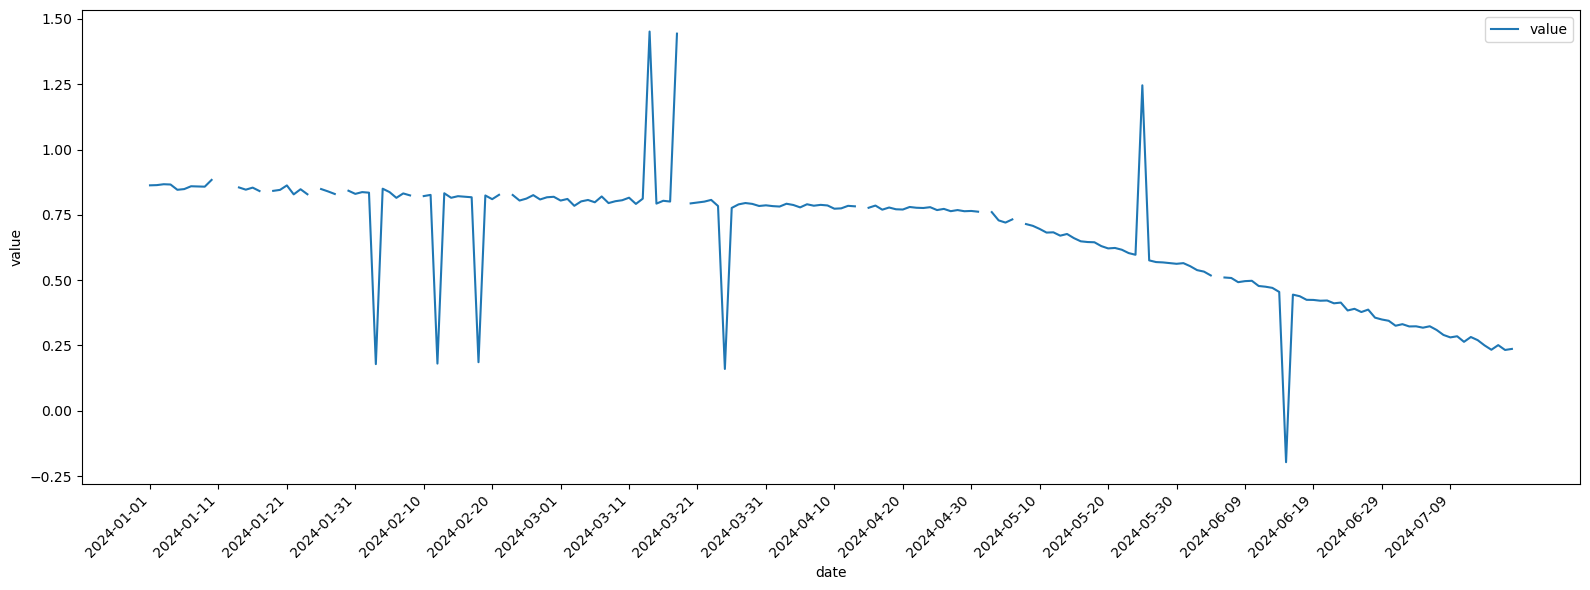

In [19]:
plot_time_series(df2,'date','value')

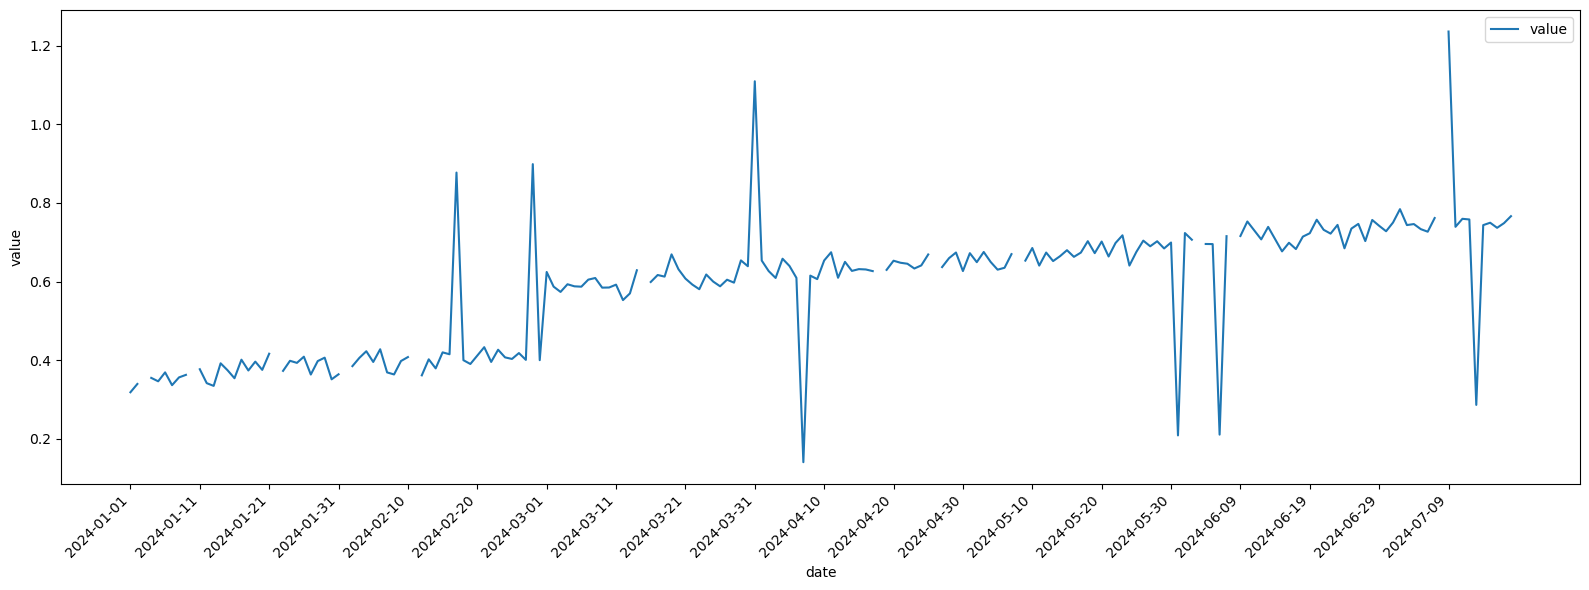

In [20]:
plot_time_series(df3,'date','value')

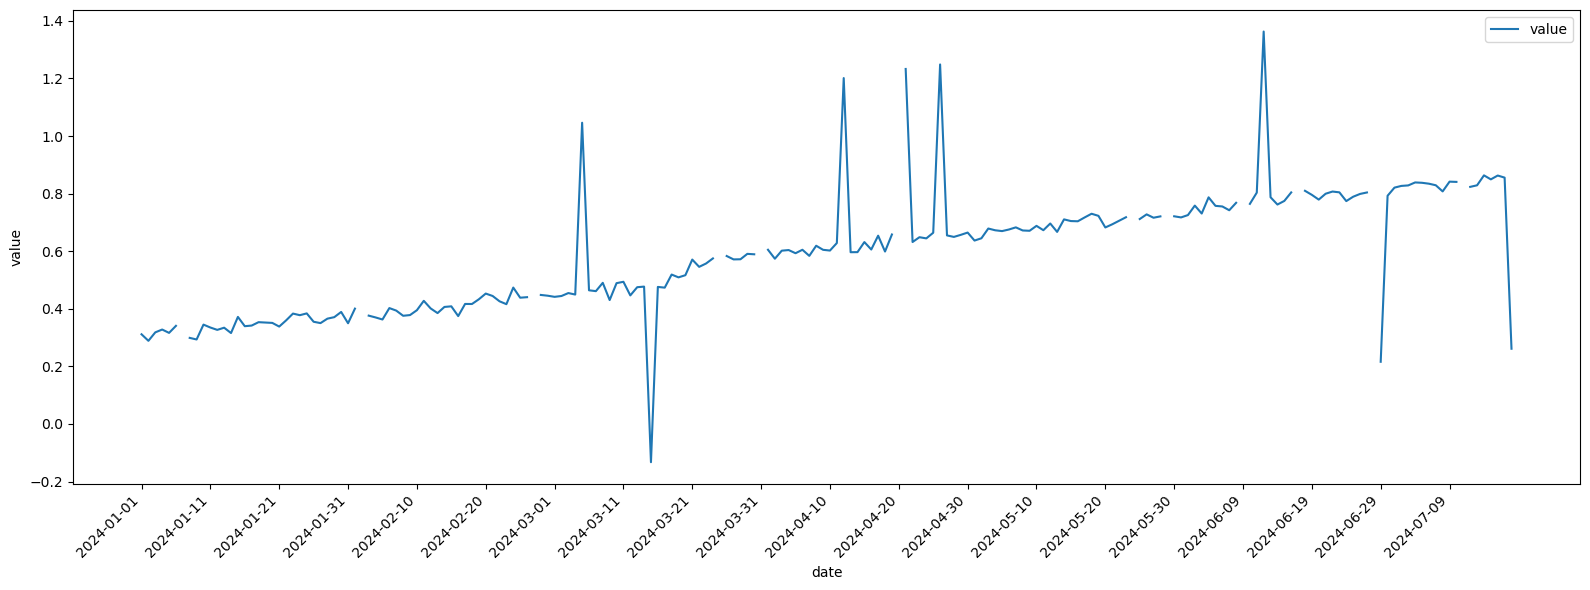

In [21]:
plot_time_series(df4,'date','value')

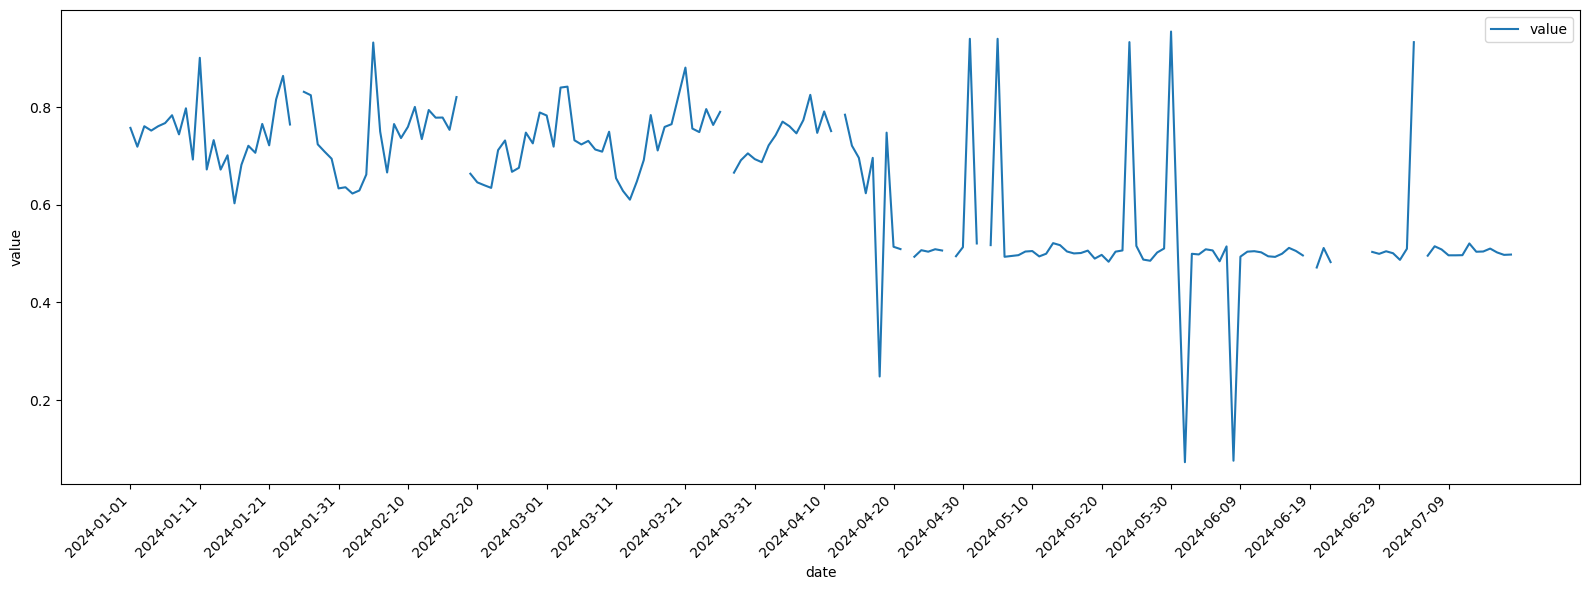

In [22]:
plot_time_series(df5,'date','value')

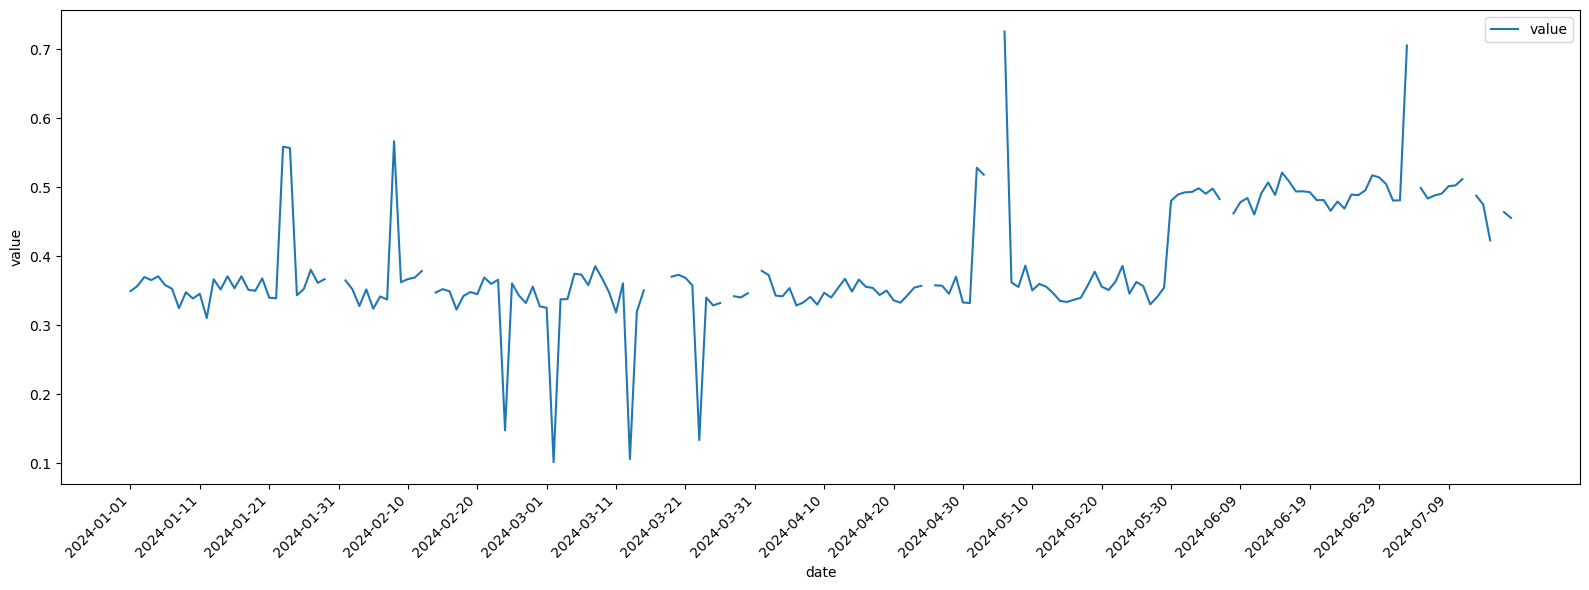

In [23]:
plot_time_series(df6,'date','value')

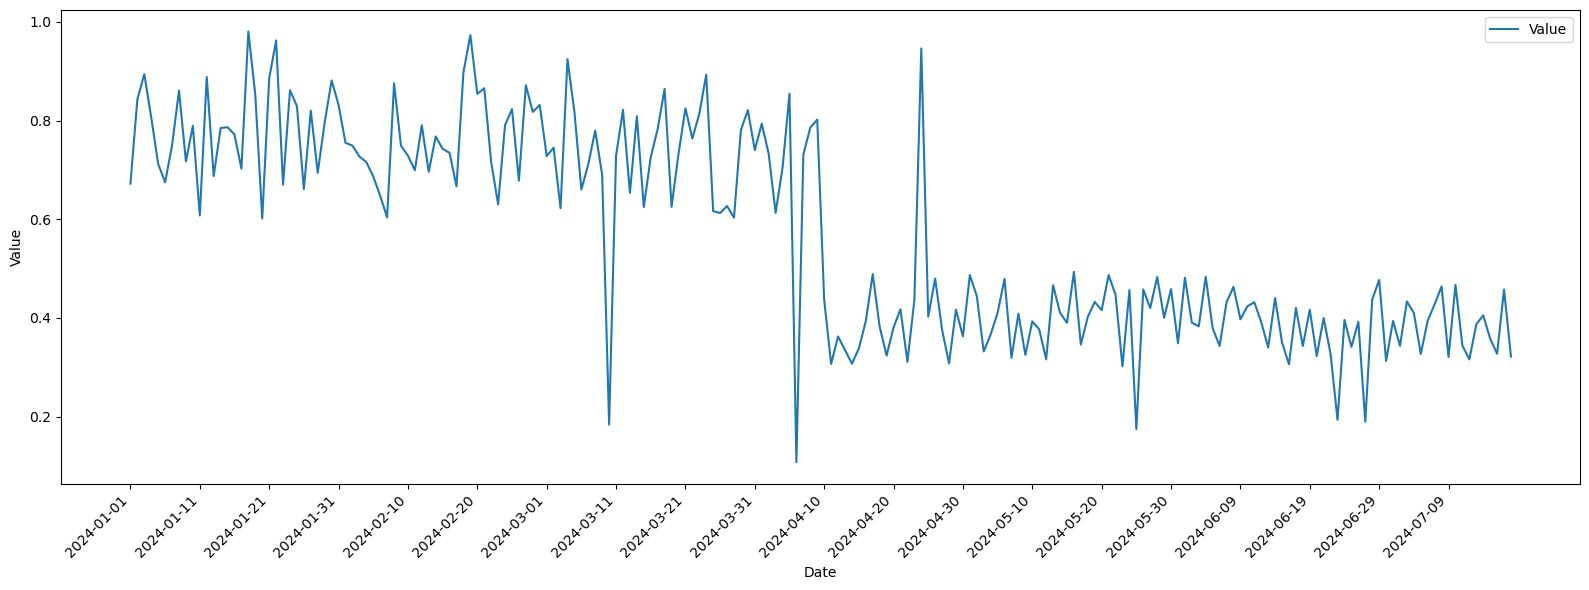

In [24]:
plot_time_series(df8,'Date','Value')

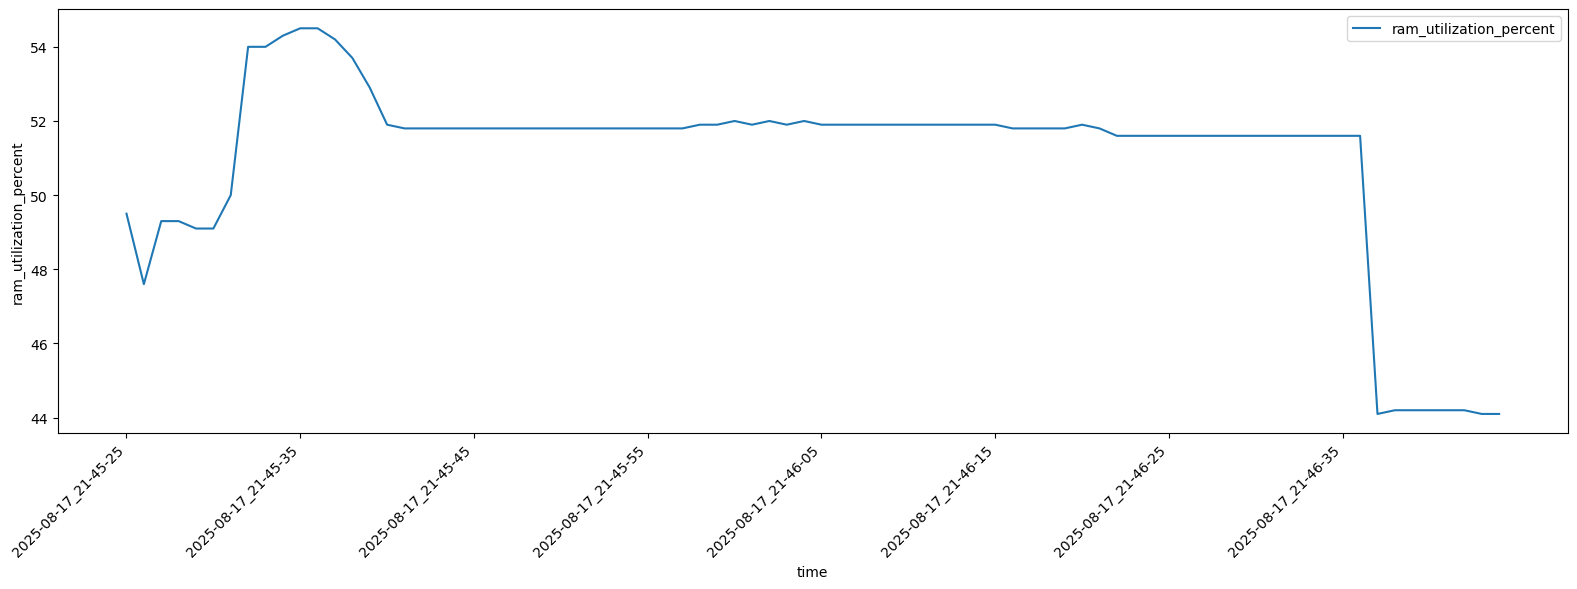

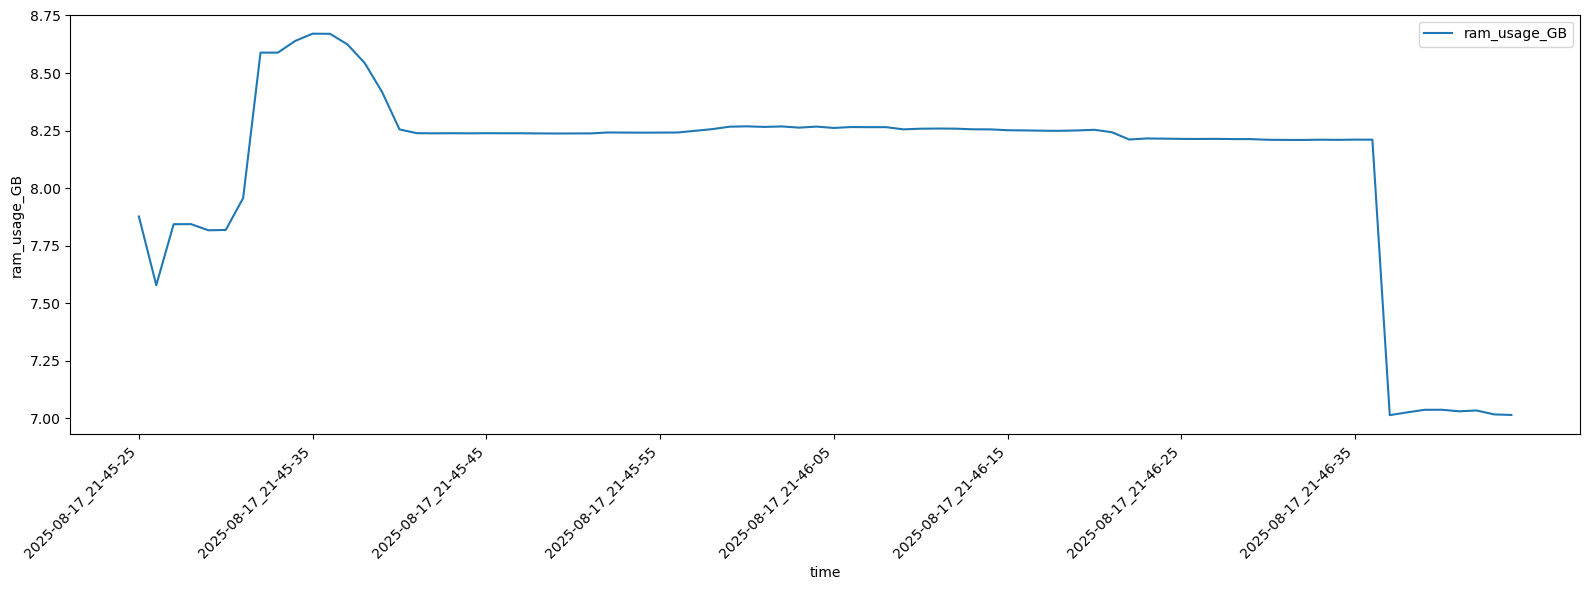

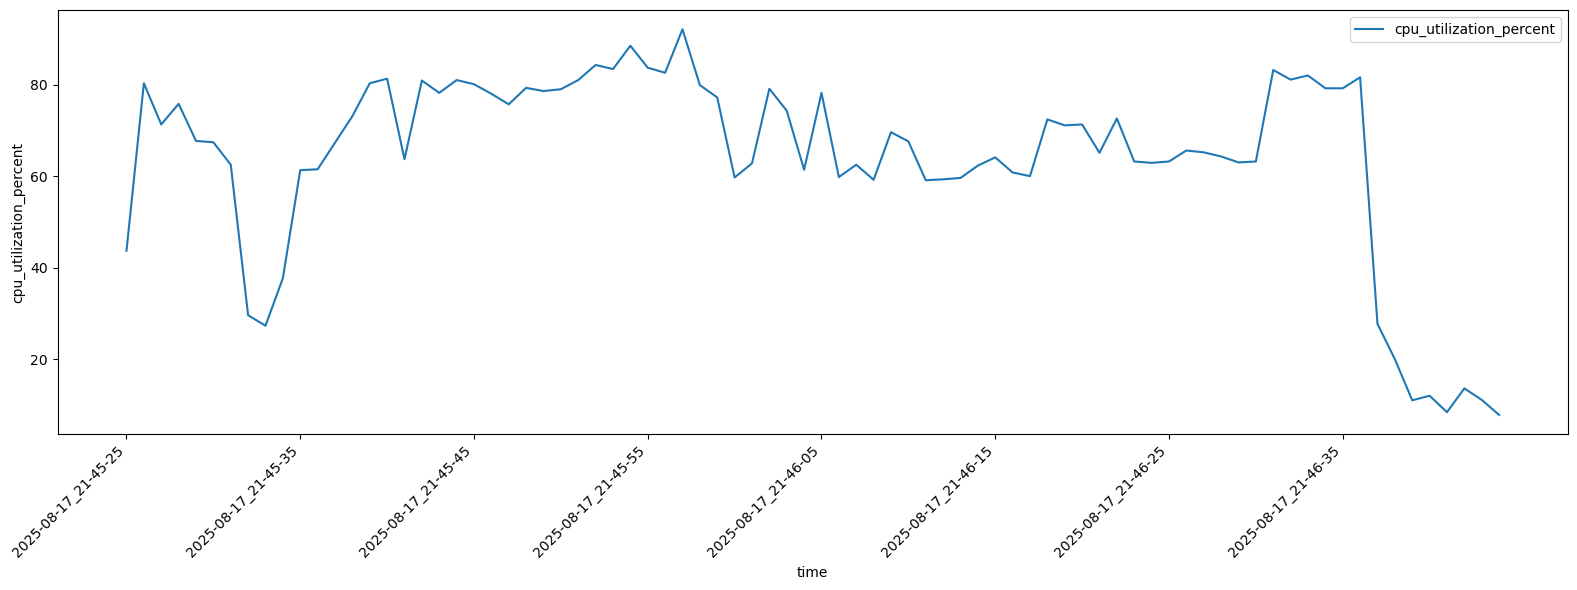

In [25]:
plot_time_series(df_4_threads,'time','ram_utilization_percent')
plot_time_series(df_4_threads,'time','ram_usage_GB')
plot_time_series(df_4_threads,'time','cpu_utilization_percent')

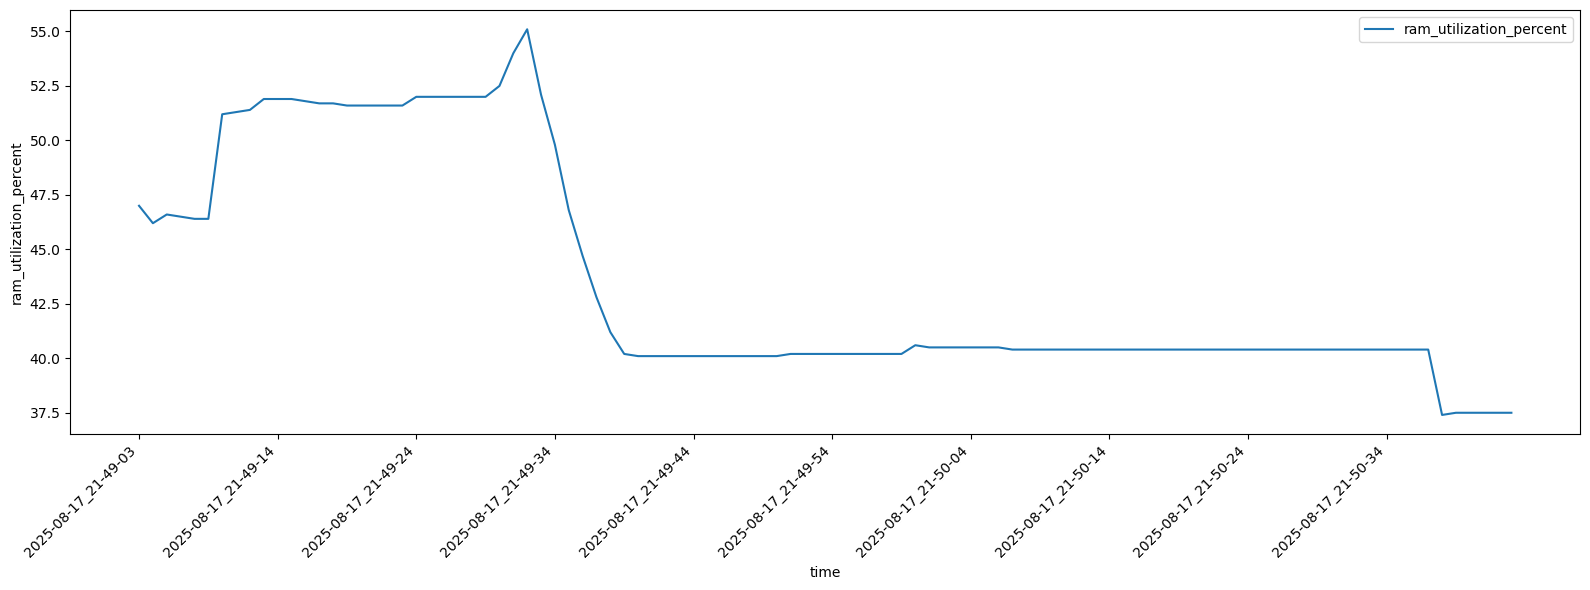

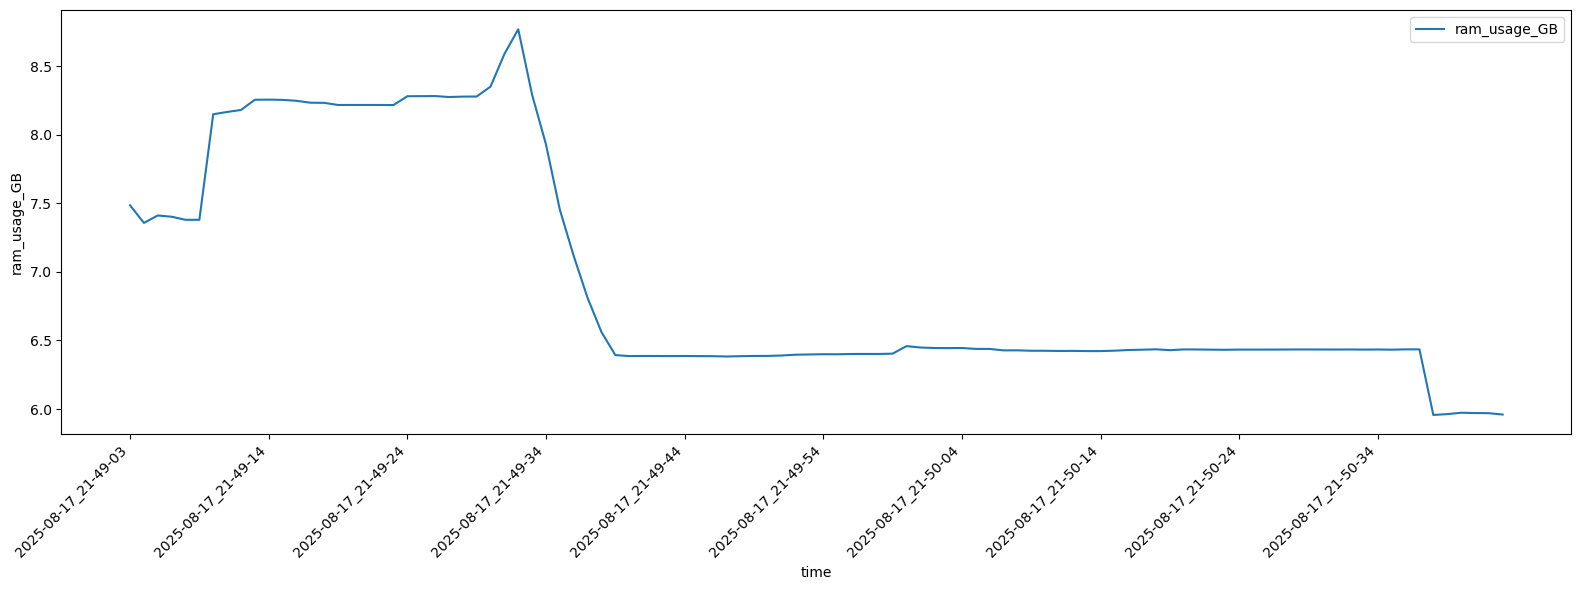

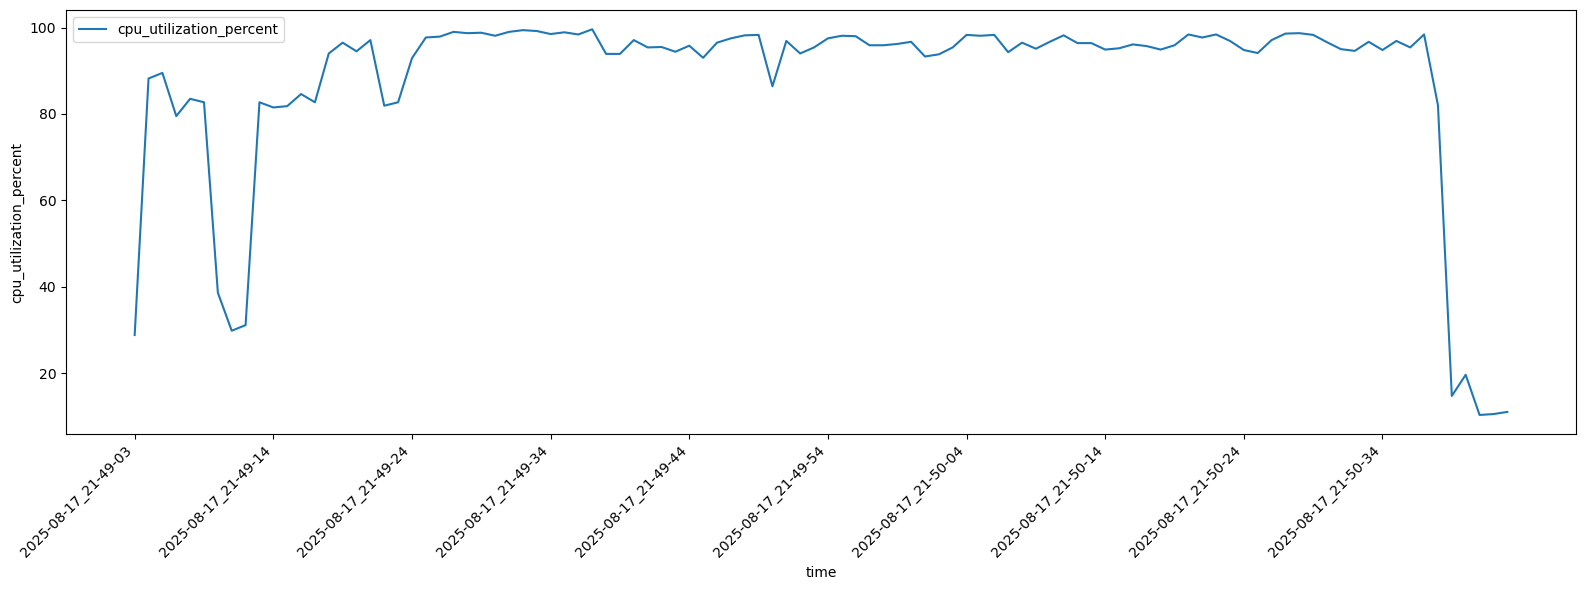

In [26]:
plot_time_series(df_6_threads,'time','ram_utilization_percent')
plot_time_series(df_6_threads,'time','ram_usage_GB')
plot_time_series(df_6_threads,'time','cpu_utilization_percent')

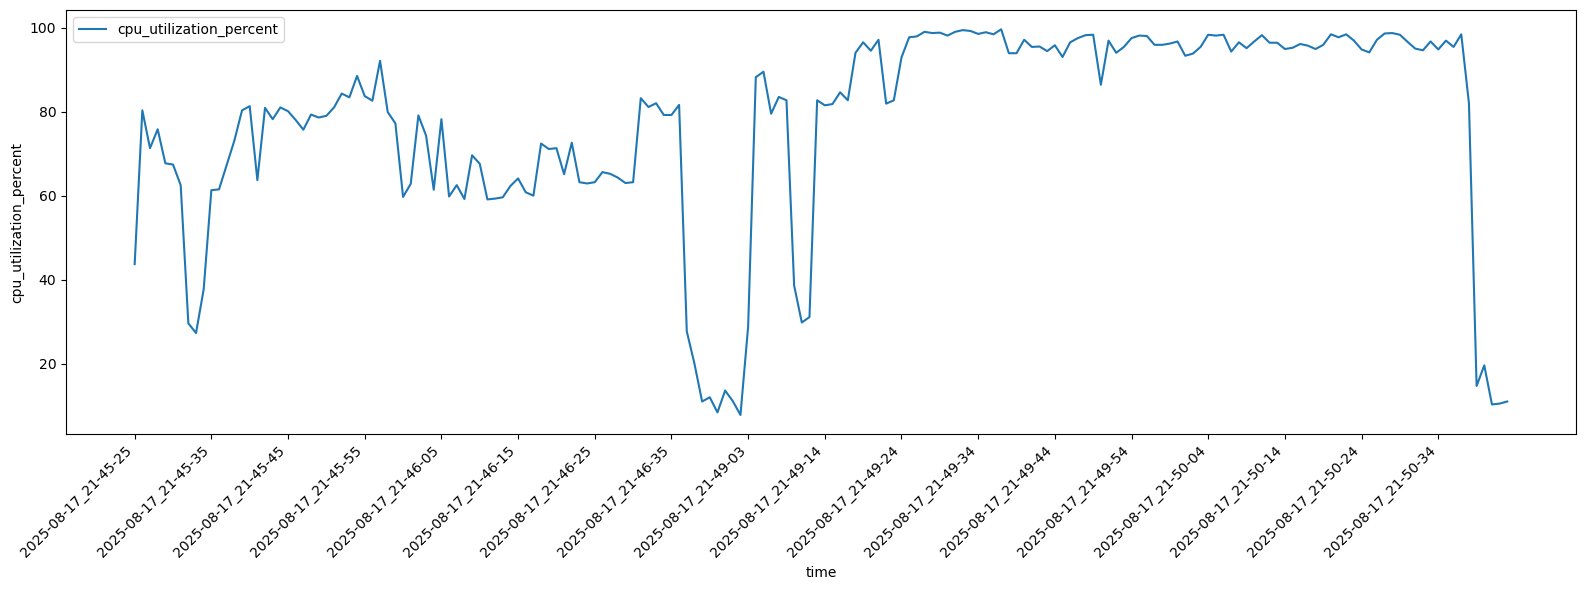

In [27]:
plot_time_series(df_4_6_threads,'time','cpu_utilization_percent')

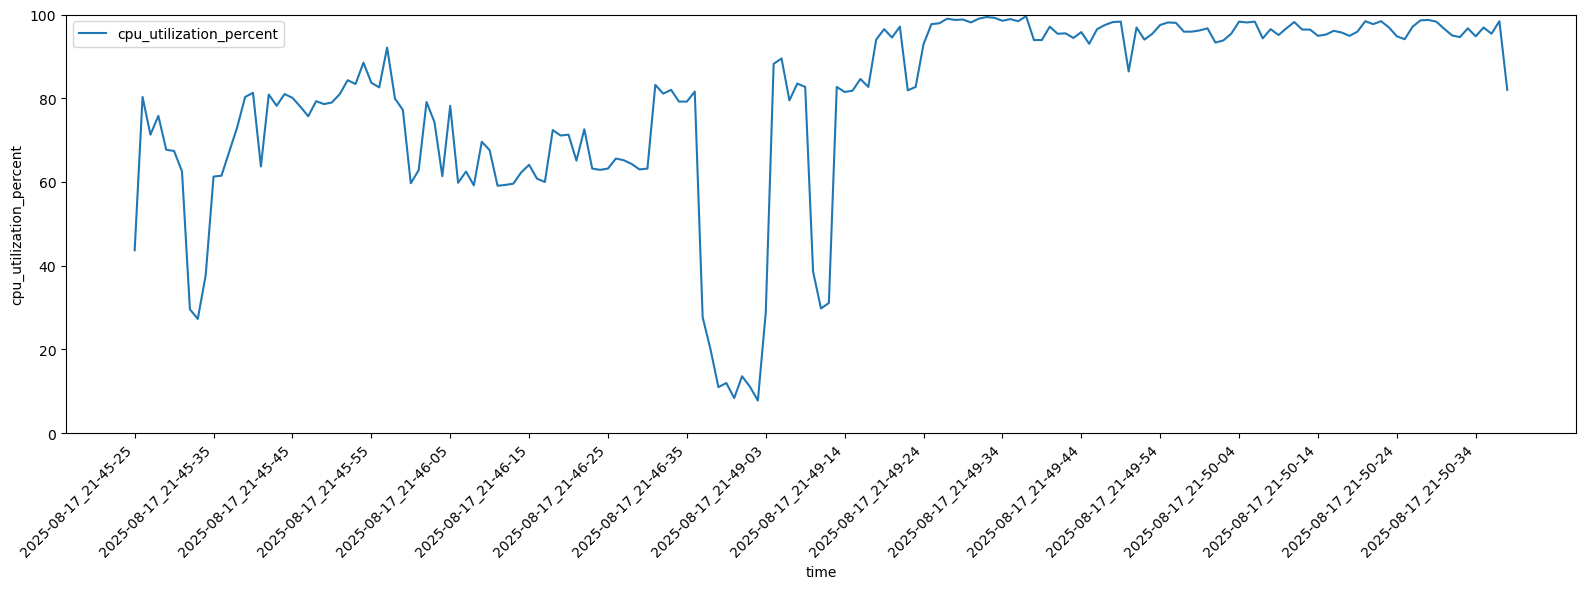

In [28]:
no_outlier_46_threads= remove_outliers_linear_regression(df=df_4_6_threads,value_col='cpu_utilization_percent', time_col='time')
plot_time_series(no_outlier_46_threads,'time','cpu_utilization_percent', ymin= 0, ymax= 100)

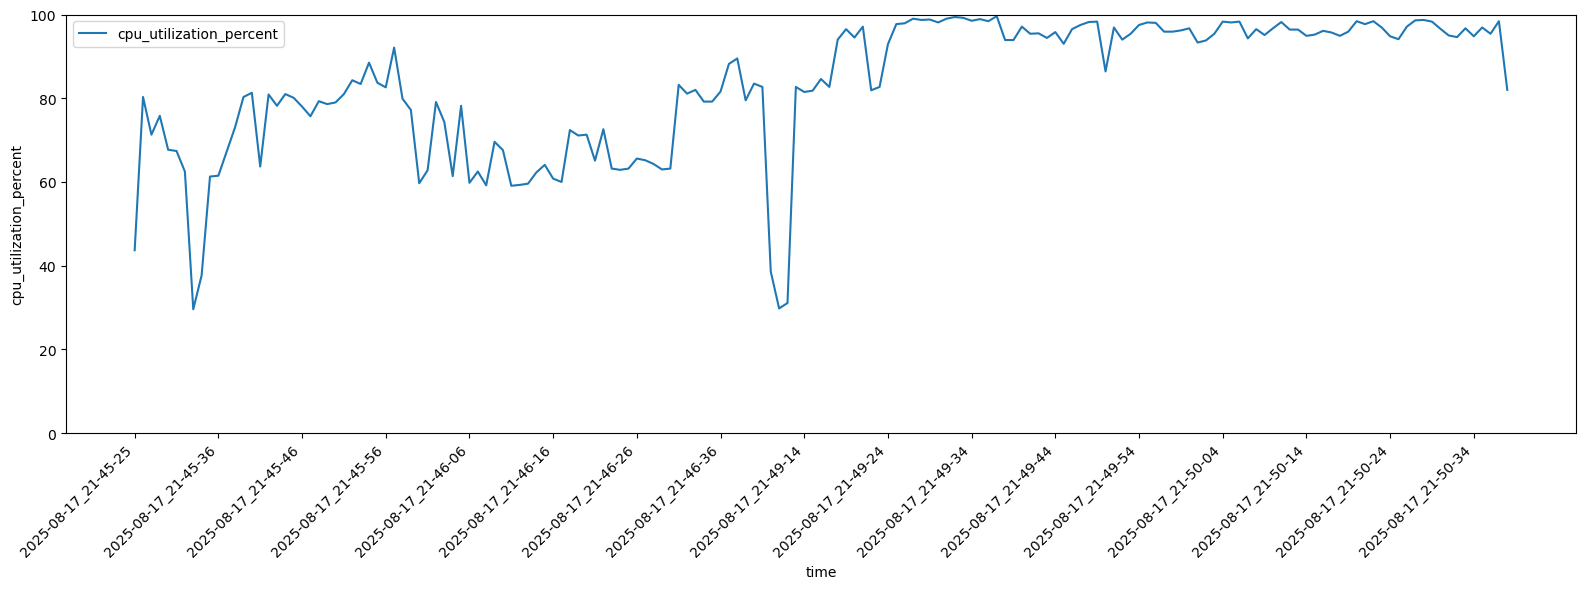

In [29]:
no_outlier_46_threads_zscore = remove_outliers_zscore(df=df_4_6_threads,col= 'cpu_utilization_percent',threshold=2)
plot_time_series(no_outlier_46_threads_zscore,'time', 'cpu_utilization_percent', ymin= 0, ymax= 100)

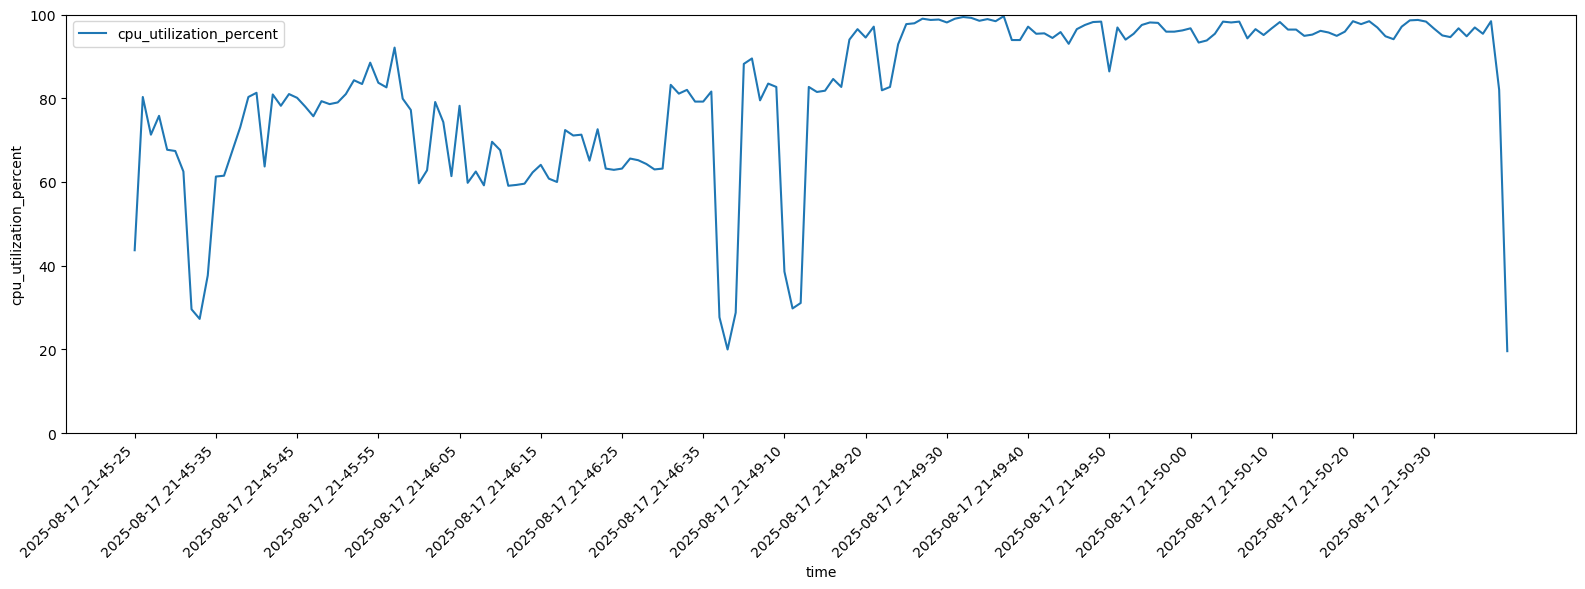

In [30]:
no_outlier_46_threads_iqr = remove_outliers_iqr(df=df_4_6_threads,col= 'cpu_utilization_percent')
plot_time_series(no_outlier_46_threads_iqr,'time', 'cpu_utilization_percent',  ymin= 0, ymax= 100)

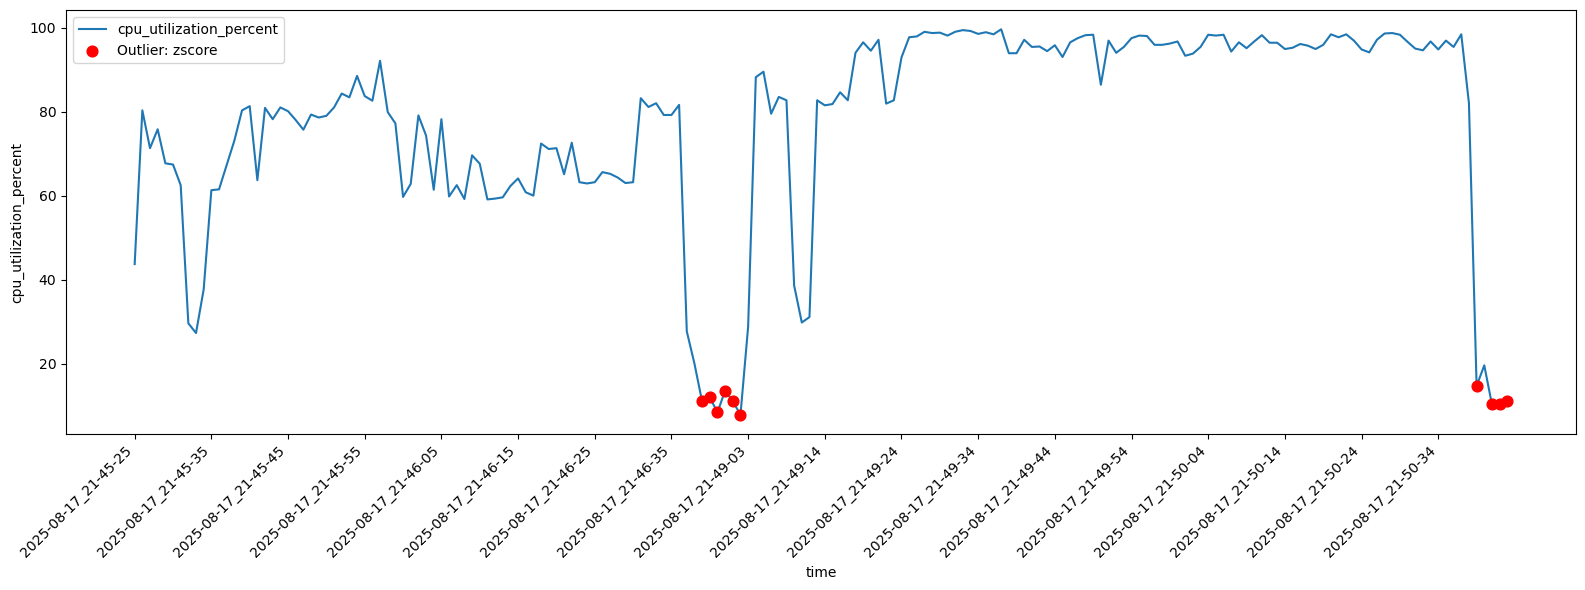

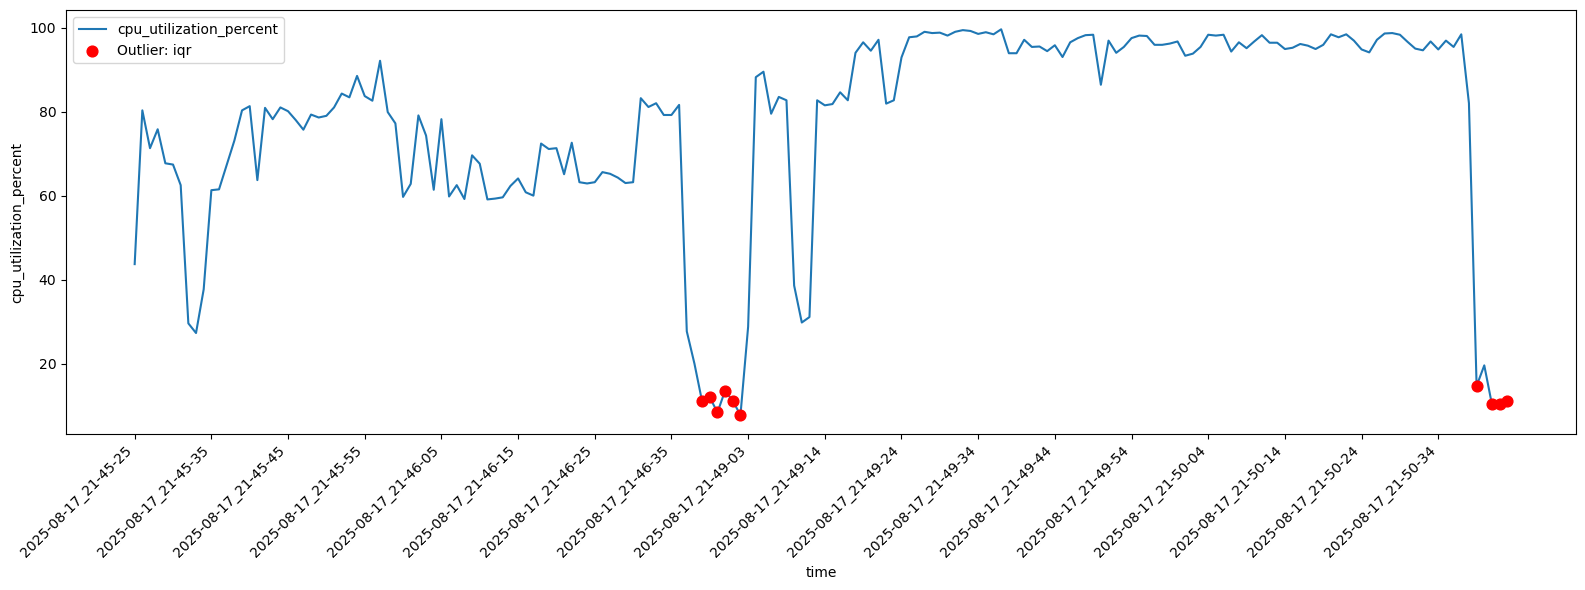

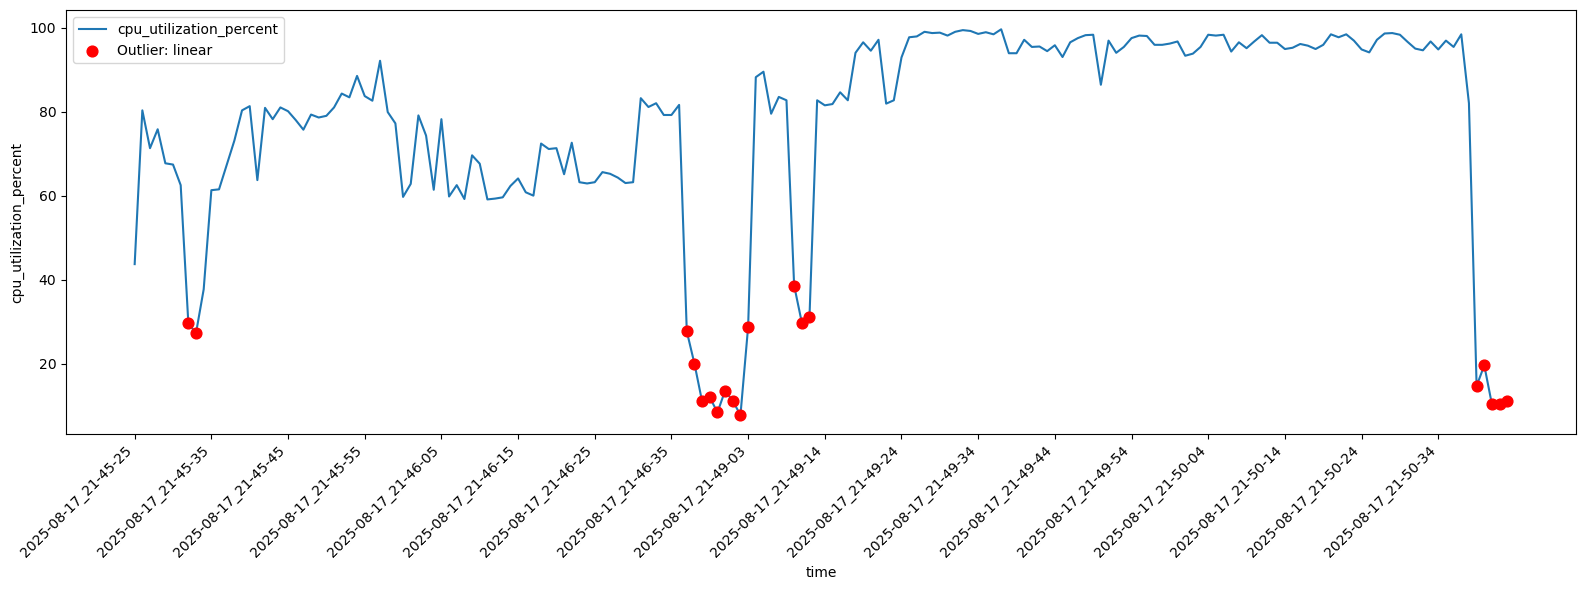

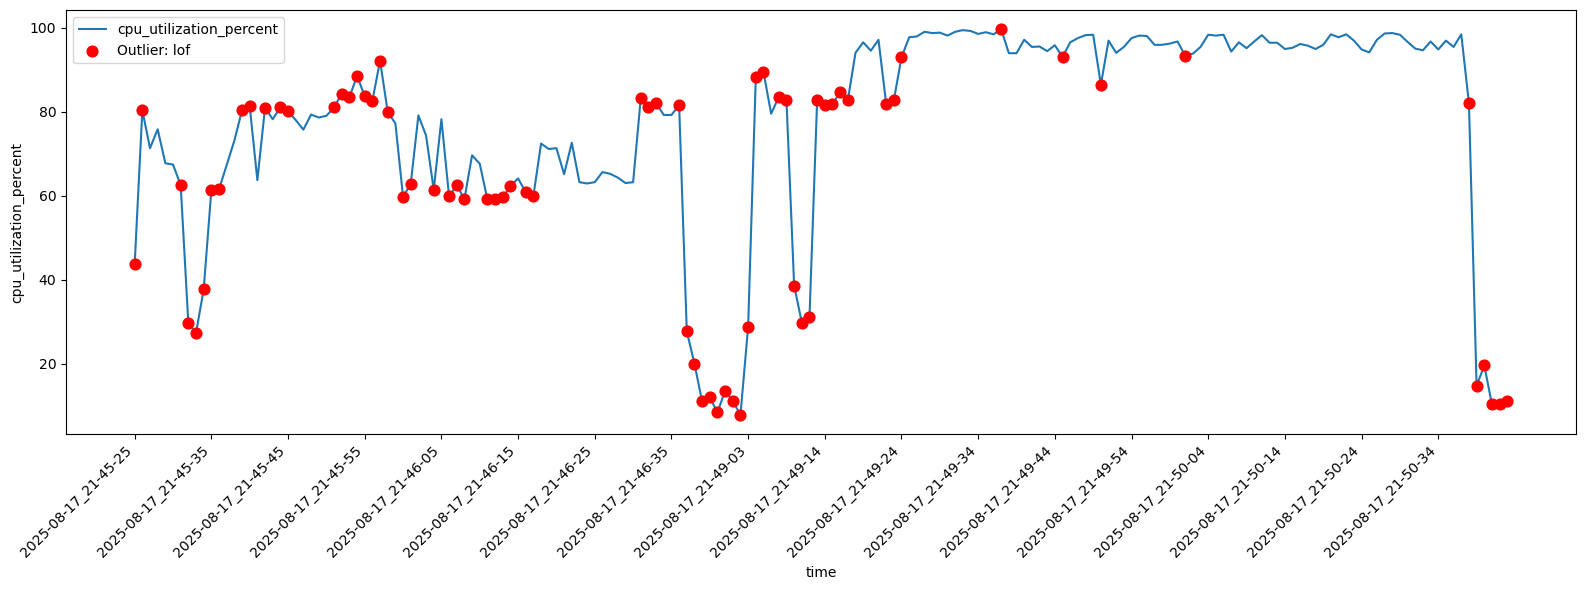

In [31]:
# Z-score based
plot_time_series(df_4_6_threads, x="time", y="cpu_utilization_percent", outlier_method="zscore", threshold=2.5)

# IQR based
plot_time_series(df_4_6_threads, x="time", y="cpu_utilization_percent", outlier_method="iqr", k=1.5)

# Linear regression based
plot_time_series(df_4_6_threads, x="time", y="cpu_utilization_percent", outlier_method="linear", z_thresh=1.5)

# LOF based 
plot_time_series(df_4_6_threads, x="time", y="cpu_utilization_percent", outlier_method="lof",n_neighbors=60, contamination=0.4)


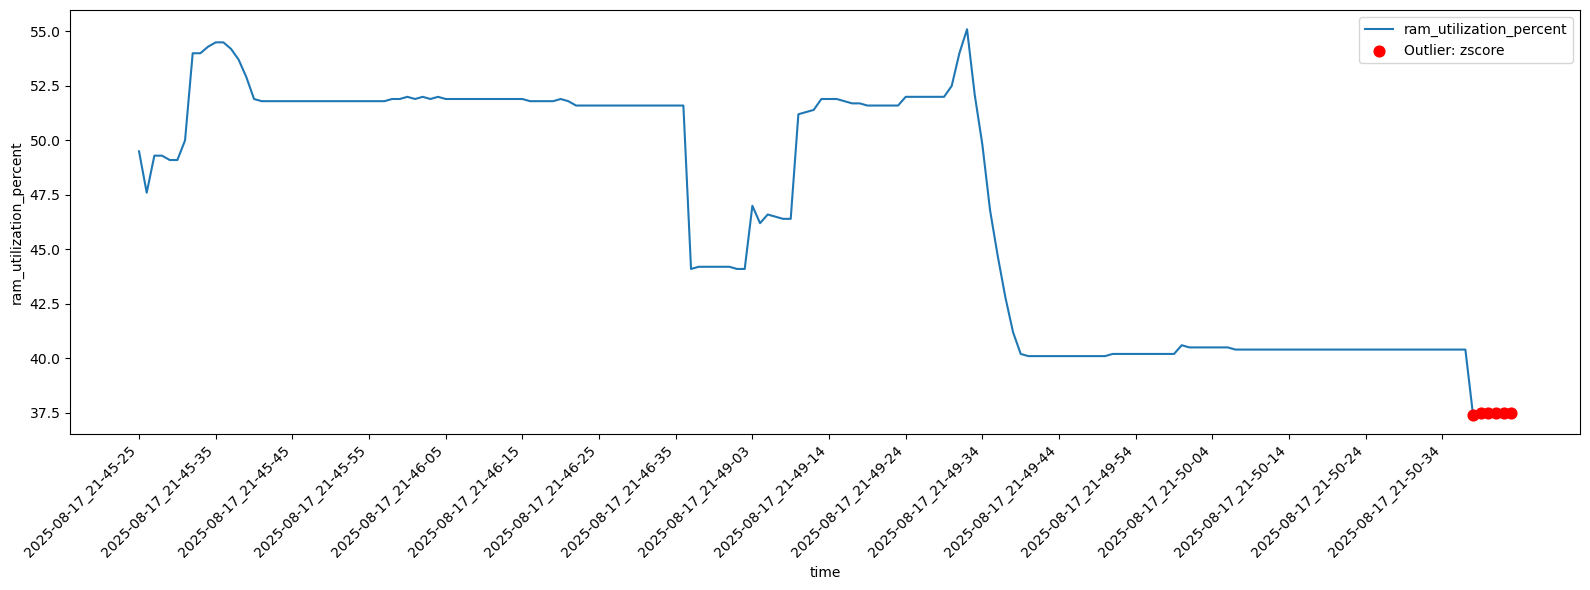

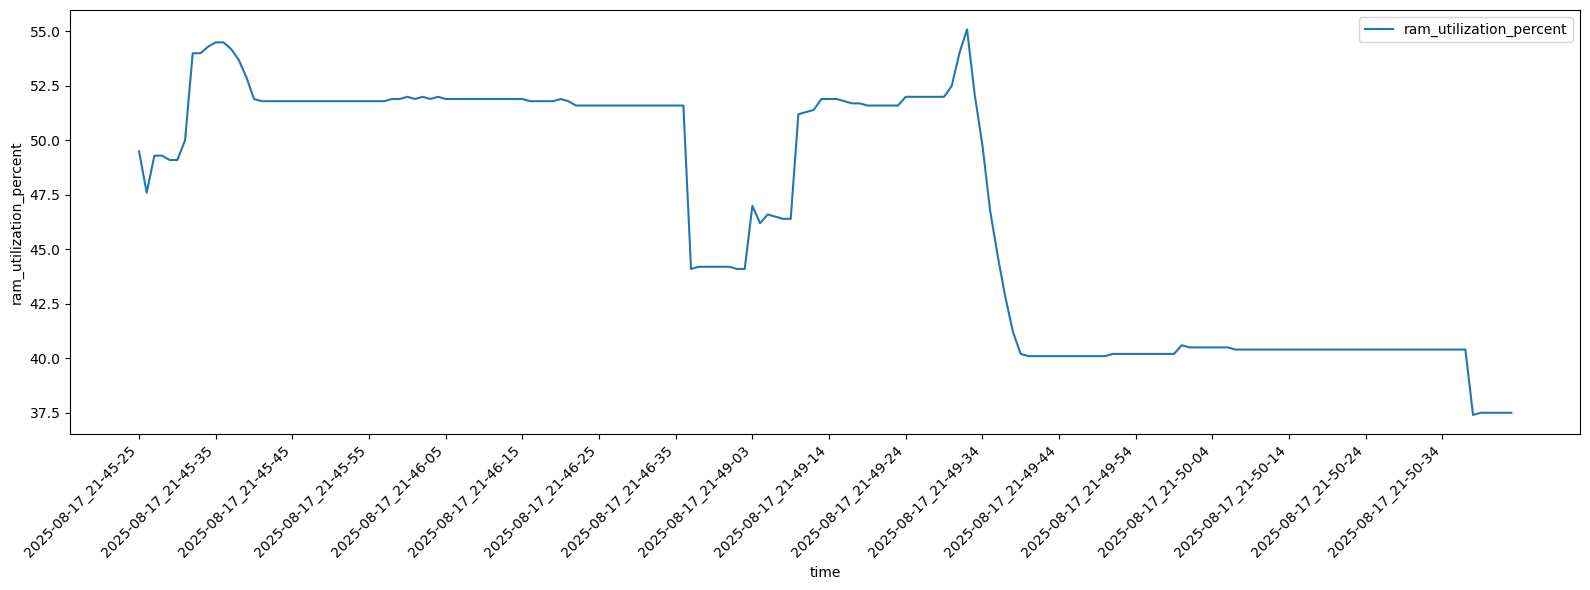

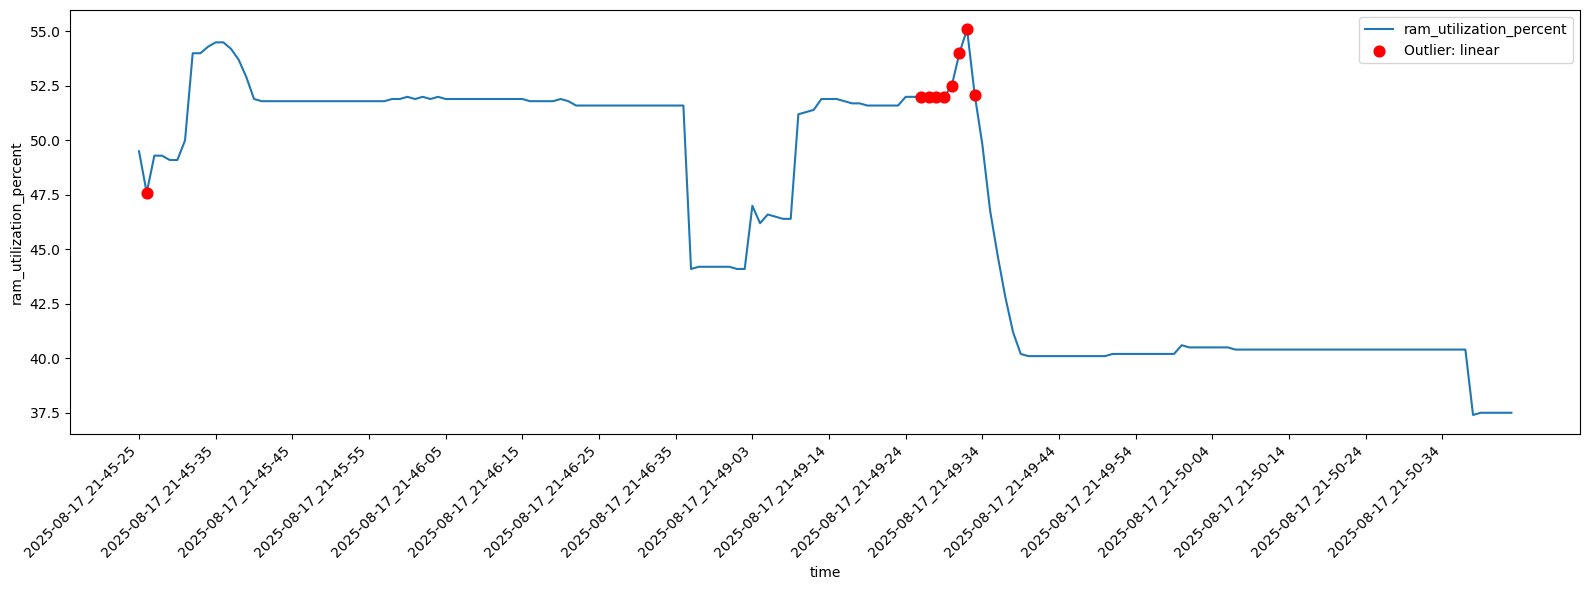

c:\Users\Abdullah\miniconda3\envs\time-series-task\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


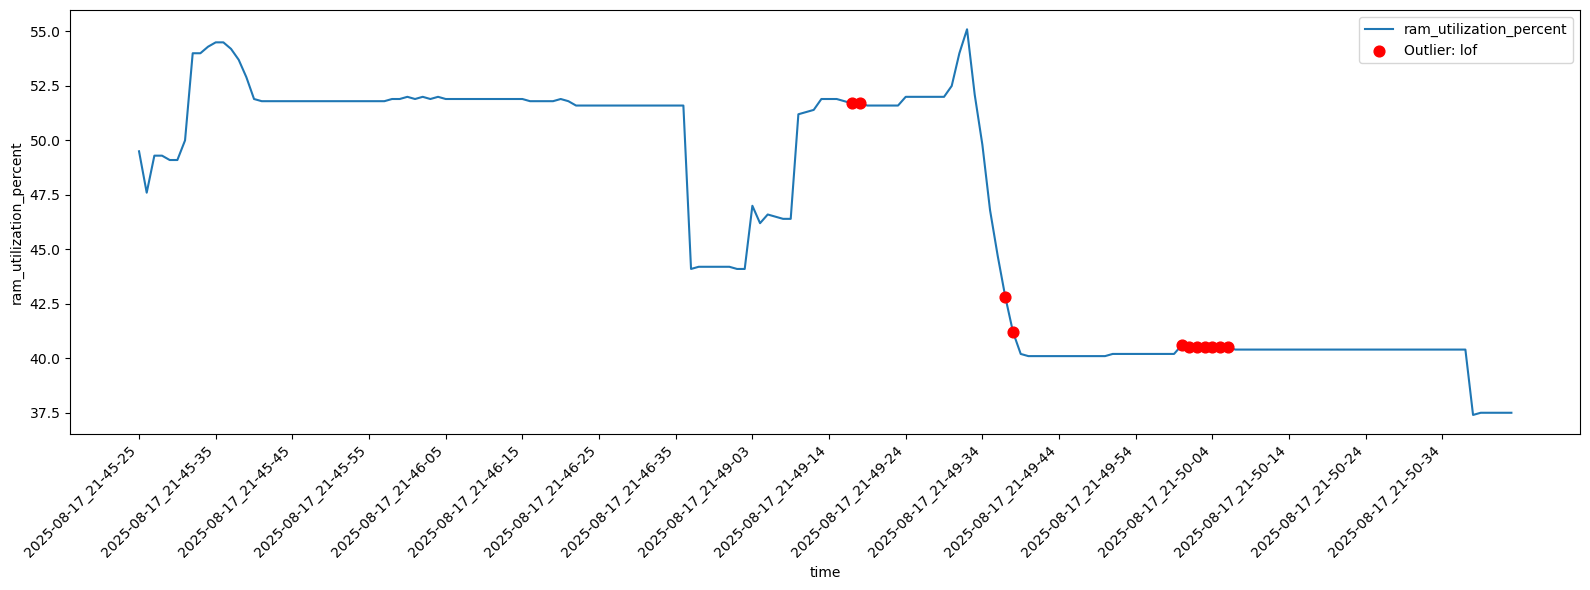

In [32]:
# Z-score based
plot_time_series(df_4_6_threads, x="time", y="ram_utilization_percent", outlier_method="zscore", threshold=1.5)

# IQR based
plot_time_series(df_4_6_threads, x="time", y="ram_utilization_percent", outlier_method="iqr", k=1.5)

# Linear regression based
plot_time_series(df_4_6_threads, x="time", y="ram_utilization_percent", outlier_method="linear", z_thresh=2)

# LOF based 
plot_time_series(df_4_6_threads, x="time", y="ram_utilization_percent", outlier_method="lof",n_neighbors=20, contamination=0.1)

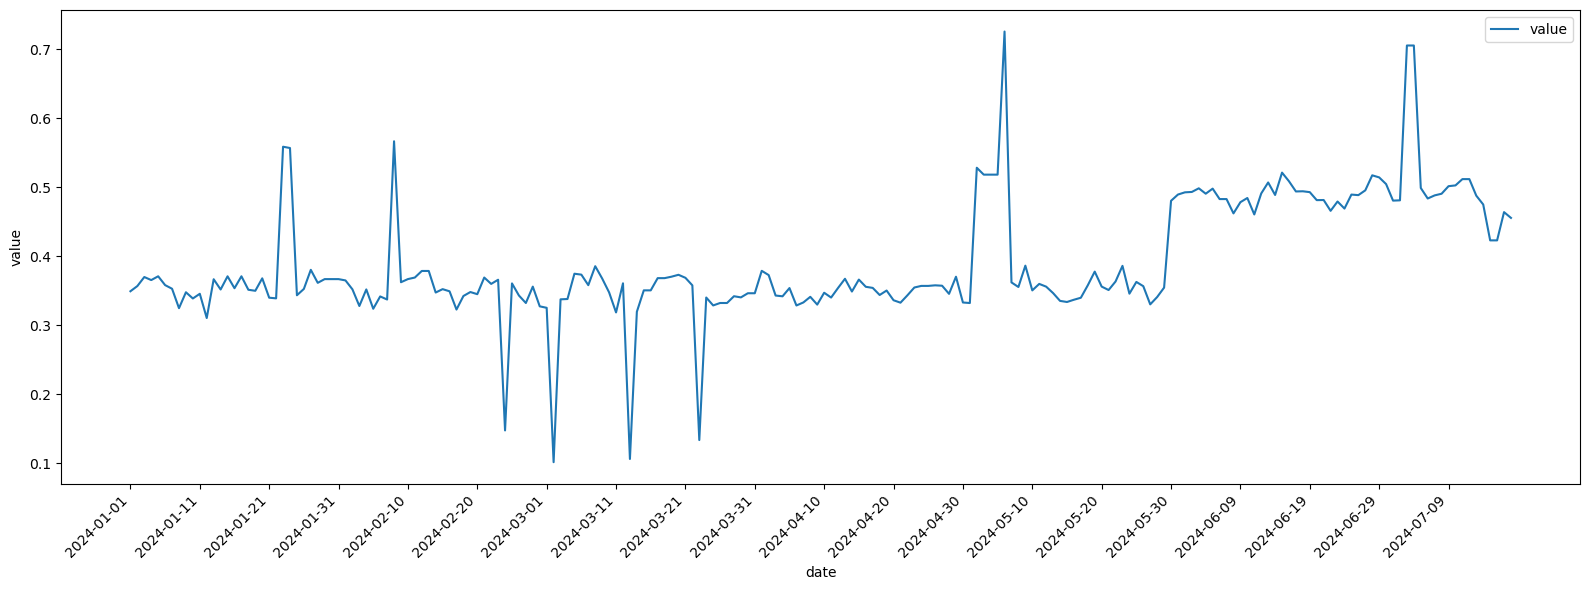

In [33]:
df6_fill_forward= fill_forward(df6, 'value')
plot_time_series(df6_fill_forward,'date','value')

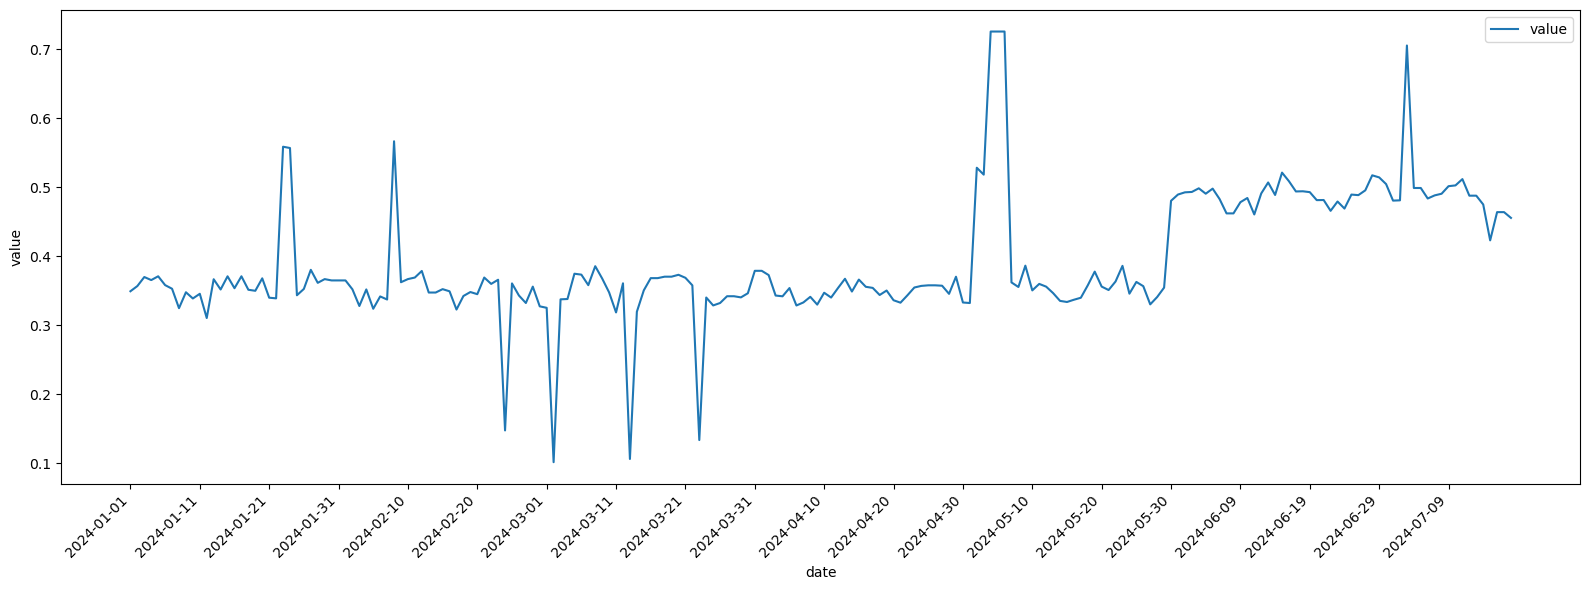

In [34]:
df6_fill_backward= fill_backward(df6, 'value')
plot_time_series(df6_fill_backward,'date','value')

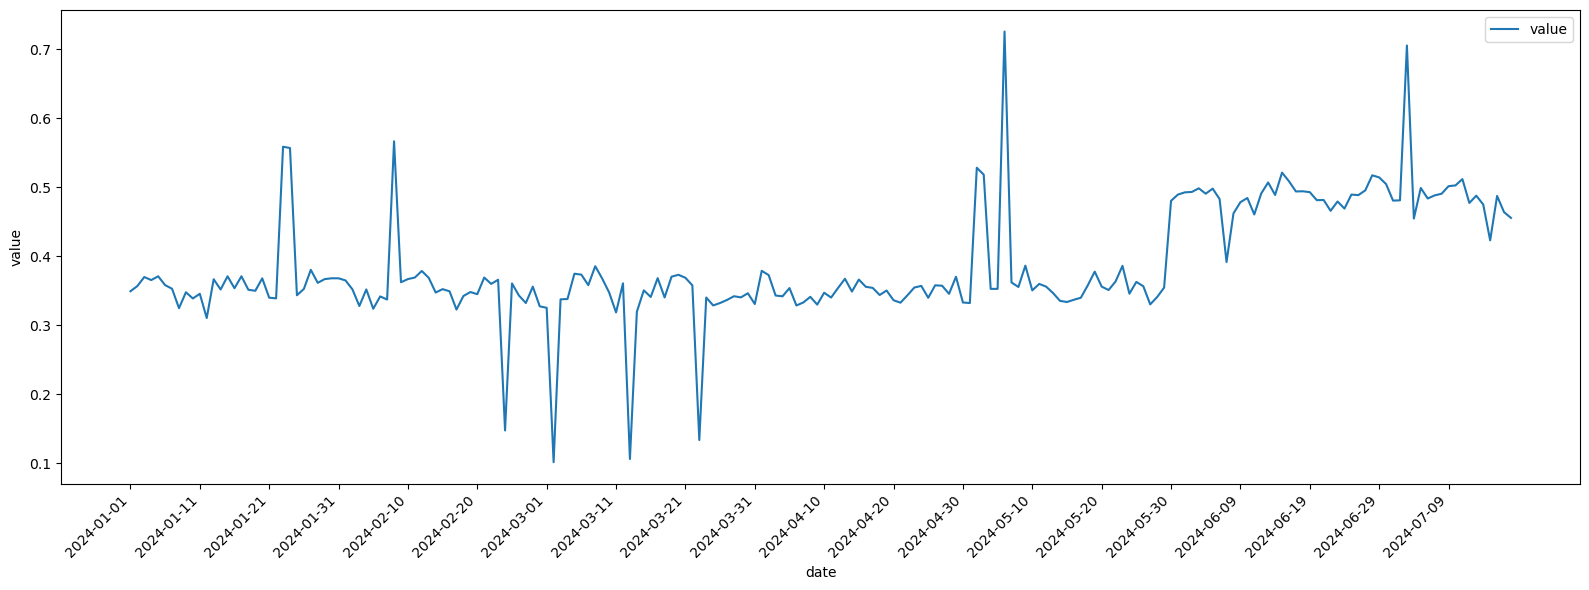

In [50]:
df6_window_mean= fill_with_window_mean(df6, 'value', window=50)
plot_time_series(df6_window_mean,'date','value')

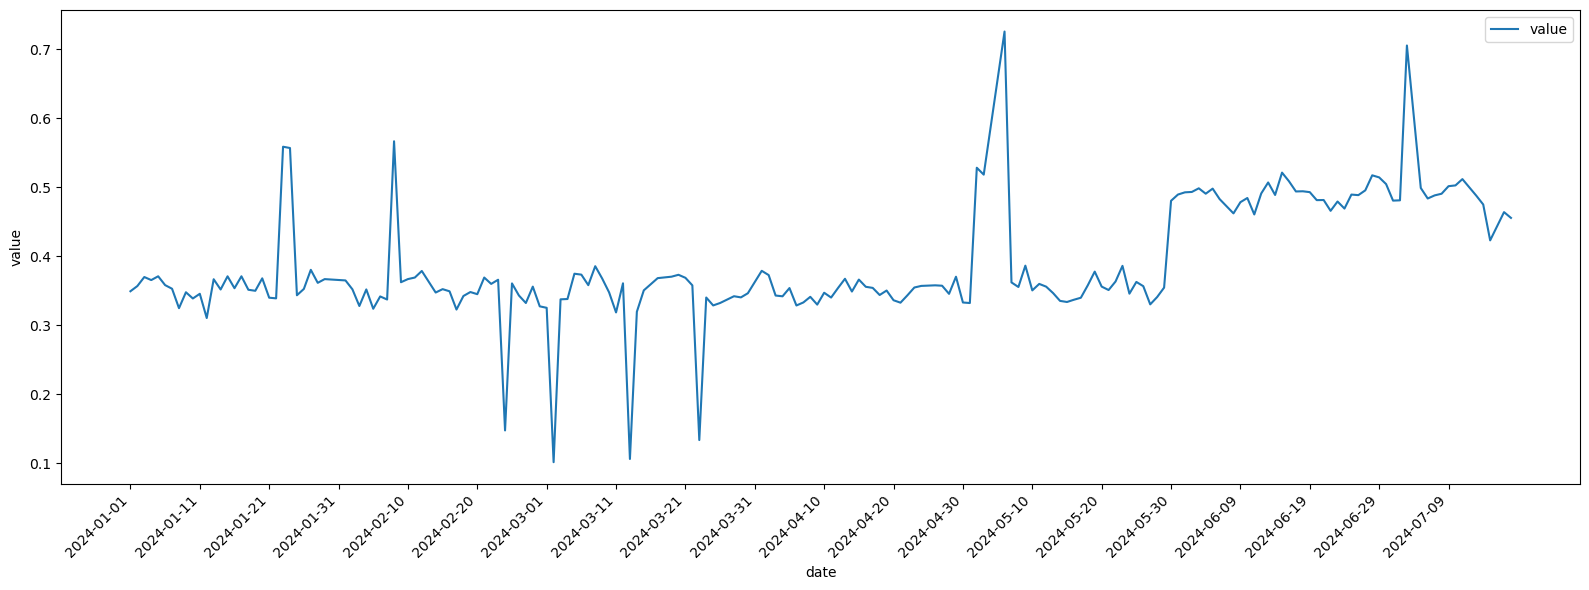

In [36]:
df6_interpolation= fill_linear_interpolation(df6,'value')
plot_time_series(df6_interpolation, 'date','value')